In [3]:
import pandas as pd

data_path = '../data/cat-in-the-dat-ii/'

train = pd.read_csv(data_path + 'train.csv', index_col= 'id')
test = pd.read_csv(data_path + 'test.csv', index_col= 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col= 'id')

### 데이터 형태 파악

In [4]:
train.shape, test.shape

((600000, 24), (400000, 23))

In [5]:
train.head().T

id,0,1,2,3,4
bin_0,0.0,1.0,0.0,NaN,0.0
bin_1,0.0,1.0,1.0,0.0,NaN
bin_2,0.0,0.0,0.0,0.0,0.0
bin_3,F,F,F,F,T
bin_4,N,Y,N,N,N
nom_0,Red,Red,Red,Red,Red
nom_1,Trapezoid,Star,NaN,Circle,Triangle
nom_2,Hamster,Axolotl,Hamster,Hamster,Hamster
nom_3,Russia,NaN,Canada,Finland,Costa Rica
nom_4,Bassoon,Theremin,Bassoon,Theremin,NaN


In [6]:
submission.head() # 0 또는 1이 될 확률을 입력해주자!

,target
id,
600000,0.5
600001,0.5
600002,0.5
600003,0.5
600004,0.5


In [7]:
def resumetable(df):
    print(f"데이터셋 형상: {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns = ['데이터타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})

    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values

    return summary
resumetable(train)

# bin: bin_3, bin_4 변환필요
# nom: nom_5 ~ nom_9의 고윳값 수가 많음.
# ord: ord 순서 파악을 위해 하나씩 분석해보자!!
# day, month, target: 별도 분석

데이터셋 형상: (600000, 24)


,피처,데이터타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,float64,17894,2,0.0,1.0,0.0
1,bin_1,float64,18003,2,0.0,1.0,1.0
2,bin_2,float64,17930,2,0.0,0.0,0.0
3,bin_3,object,18014,2,F,F,F
4,bin_4,object,18047,2,N,Y,N
5,nom_0,object,18252,3,Red,Red,Red
6,nom_1,object,18156,6,Trapezoid,Star,NaN
7,nom_2,object,18035,6,Hamster,Axolotl,Hamster
8,nom_3,object,18121,6,Russia,NaN,Canada
9,nom_4,object,18035,4,Bassoon,Theremin,Bassoon


In [8]:
# 1번 경우와 동일
for i in range(6):
    feature = 'ord_' + str(i)
    print(f"{feature} 고유값: {train[feature].unique()}")

ord_0 고유값: [ 3.  1.  2. nan]
ord_1 고유값: ['Contributor' 'Grandmaster' nan 'Novice' 'Expert' 'Master']
ord_2 고유값: ['Hot' 'Warm' 'Freezing' 'Lava Hot' 'Cold' 'Boiling Hot' nan]
ord_3 고유값: ['c' 'e' 'n' 'a' 'h' 'b' 'd' 'k' 'g' 'o' 'i' 'm' nan 'f' 'l' 'j']
ord_4 고유값: ['U' 'X' 'P' 'C' 'Q' 'R' 'Y' 'N' 'I' 'O' 'M' 'E' 'V' 'K' 'G' 'B' 'H' nan
 'T' 'W' 'A' 'F' 'D' 'S' 'J' 'L' 'Z']
ord_5 고유값: ['Pw' 'pE' 'eN' nan 'OZ' 'wa' 'rg' 'PS' 'mX' 'hG' 'xF' 'RV' 'Nh' 'dp' 'SS'
 'OM' 'Rv' 'HF' 'iS' 'HK' 'Ib' 'AW' 'mi' 'jf' 'Tz' 'ok' 'nS' 'Sz' 'sf'
 'Fl' 'fV' 'iv' 'US' 'dh' 'Io' 'RD' 'oI' 'DN' 'IS' 'oh' 'YJ' 'vq' 'us'
 'sY' 'th' 'Ey' 'AI' 'Mg' 'oU' 'Dj' 'TH' 'CN' 'aA' 'tT' 'Wr' 'TZ' 'mo'
 'rM' 'Pk' 'UV' 'RT' 'DT' 'Hk' 'Dn' 'nj' 'gL' 'cy' 'JT' 'XC' 'lA' 'TL'
 'zp' 'XM' 'AG' 'WW' 'GZ' 'MV' 'Bx' 'oJ' 'ze' 'Rj' 'LY' 'Iq' 'gc' 'LS'
 'hx' 'JQ' 'fO' 'vx' 'MX' 'ly' 'BX' 'Yr' 'XR' 'yE' 'Sk' 'aE' 'wU' 'rA'
 'Ji' 'qN' 'nn' 'kv' 'pB' 'sc' 'EC' 'kT' 'be' 'uQ' 'DI' 'hT' 'pl' 'tn'
 'xG' 'NT' 'fe' 'lS' 'Mq' 'Yi' 'BL' 'AU' 'ht

In [9]:
print('day 고유값:', train['day'].unique()) # 요일
print('month 고유값:', train['month'].unique()) # 1 ~ 12
print('target 고유값:', train['target'].unique()) # 이진분류, 우리의 목표

day 고유값: [ 6.  7.  5.  3.  1.  2. nan  4.]
month 고유값: [ 3.  7.  9. 12.  4.  6.  1.  8.  5. 11. nan 10.  2.]
target 고유값: [0 1]


### 시각화

In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃 값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100

        ax.text(x = left_coord + width / 2.0,
                y = height + total_size*0.005,
                s = f'{percent:1.1f}%',
                ha = 'center')

Text(0.5, 1.0, 'Target Distribution')

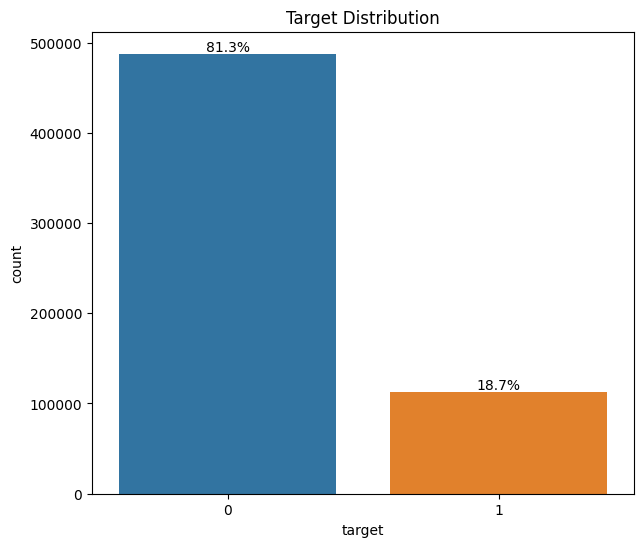

In [12]:
plt.figure(figsize = (7,6))
ax = sns.countplot(x = 'target', data = train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')


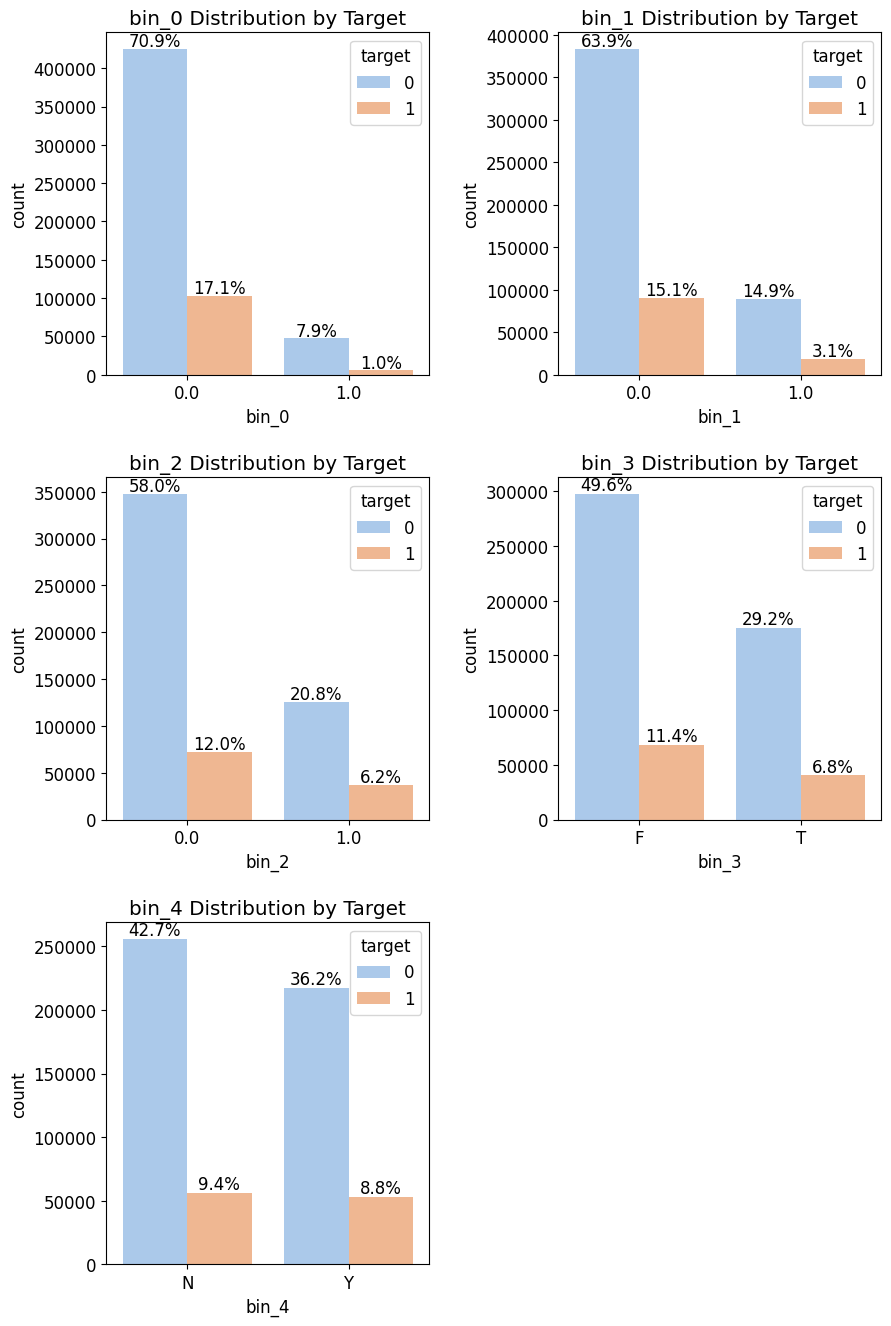

In [13]:
# 이진 피쳐 분포
import matplotlib.gridspec as gridspec

mpl.rc('font', size = 12)
grid = gridspec.GridSpec(3,2)
plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    sns.countplot(x = feature, 
                  data = train,
                  hue = 'target',
                  palette = 'pastel',
                  ax = ax)
    
    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(train))

In [16]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=feature, y=1, data = crosstab, order=crosstab[feature].values, color='black')
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    ax2.set_ylabel("Target 1 Ratio (%)")


In [17]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size = (15,20)):
    # 틀 짜기
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.45, hspace=0.3)

    # plot 그리기
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)

        # Plot 1. countplot
        sns.countplot(x=feature, data = df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax = ax)
        
        # 비율 추가
        write_percent(ax, len(df))
        # Plot 2. pointplot
        plot_pointplot(ax, feature, crosstab)

        ax.set_title(f"{feature} Distribution")

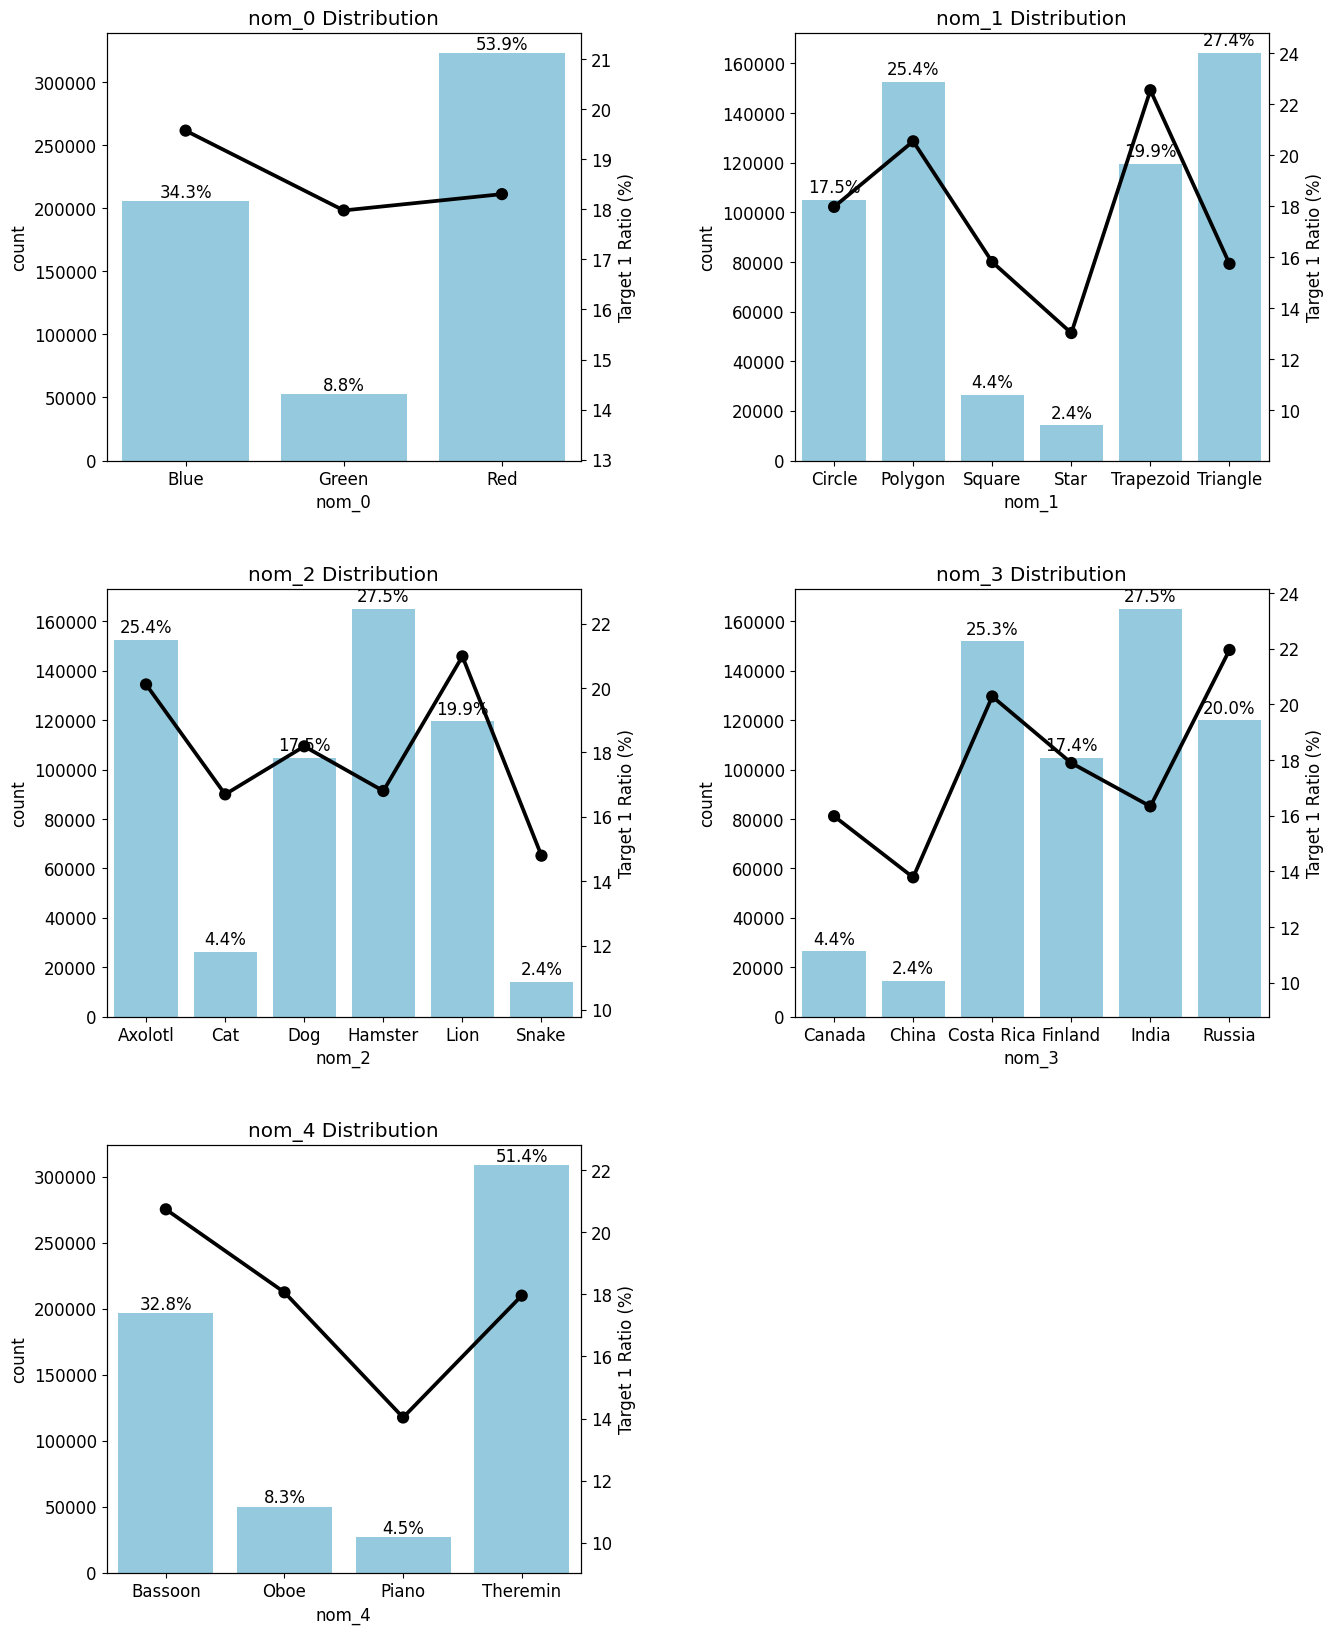

In [18]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

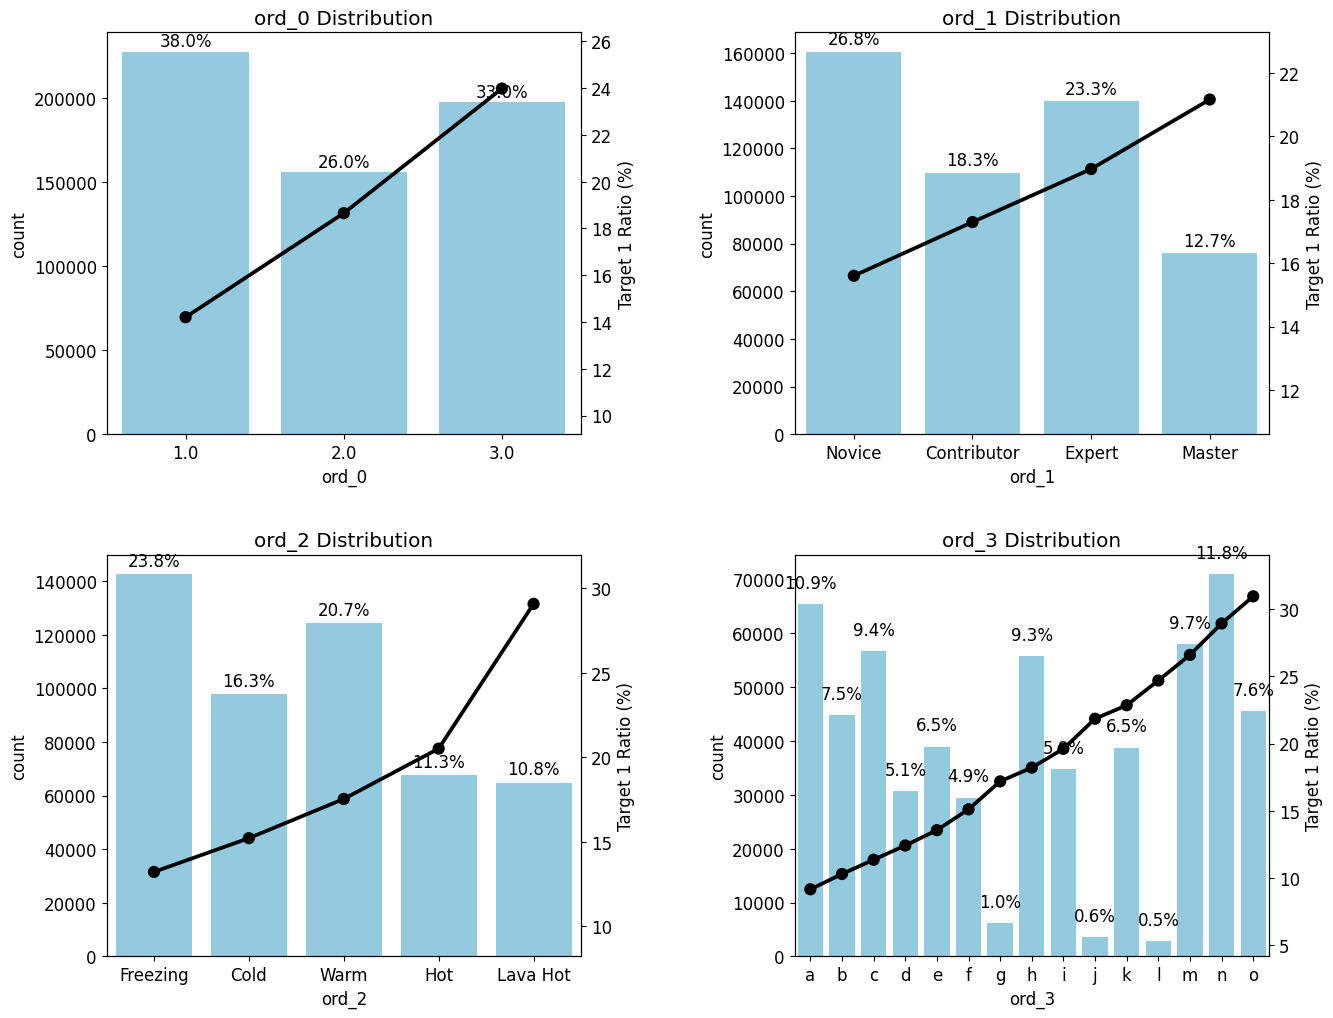

In [21]:
# 순서형 값 정렬 필요

from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'GrandMaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boling Hot', 'Lava Hot']

ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15,12))

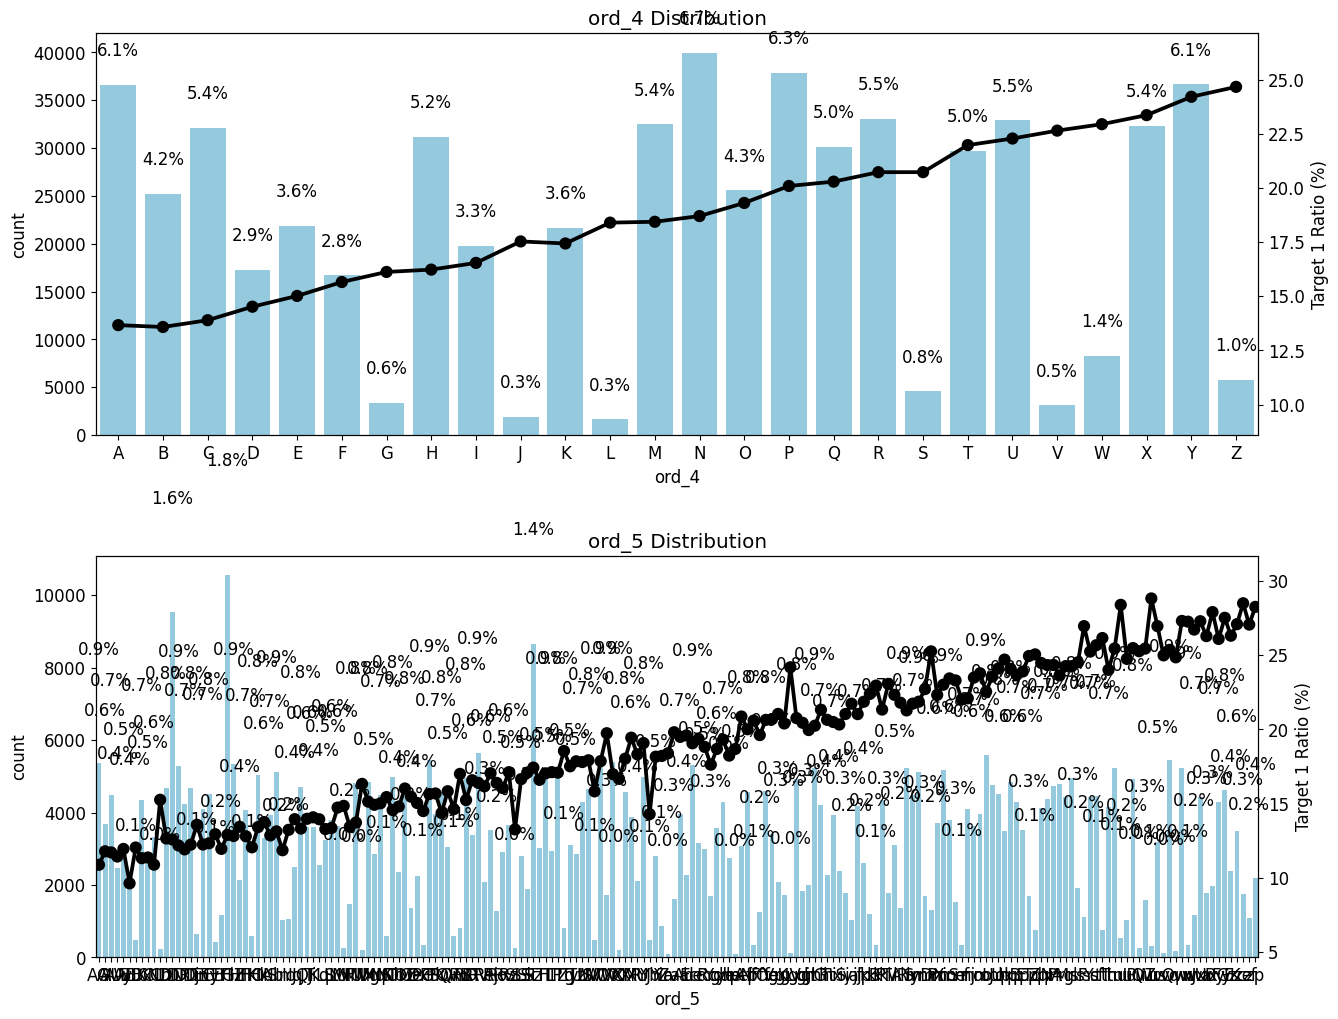

In [22]:
plot_cat_dist_with_true_ratio(train, ['ord_4','ord_5'], num_rows=2, num_cols=1, size=(15,12))

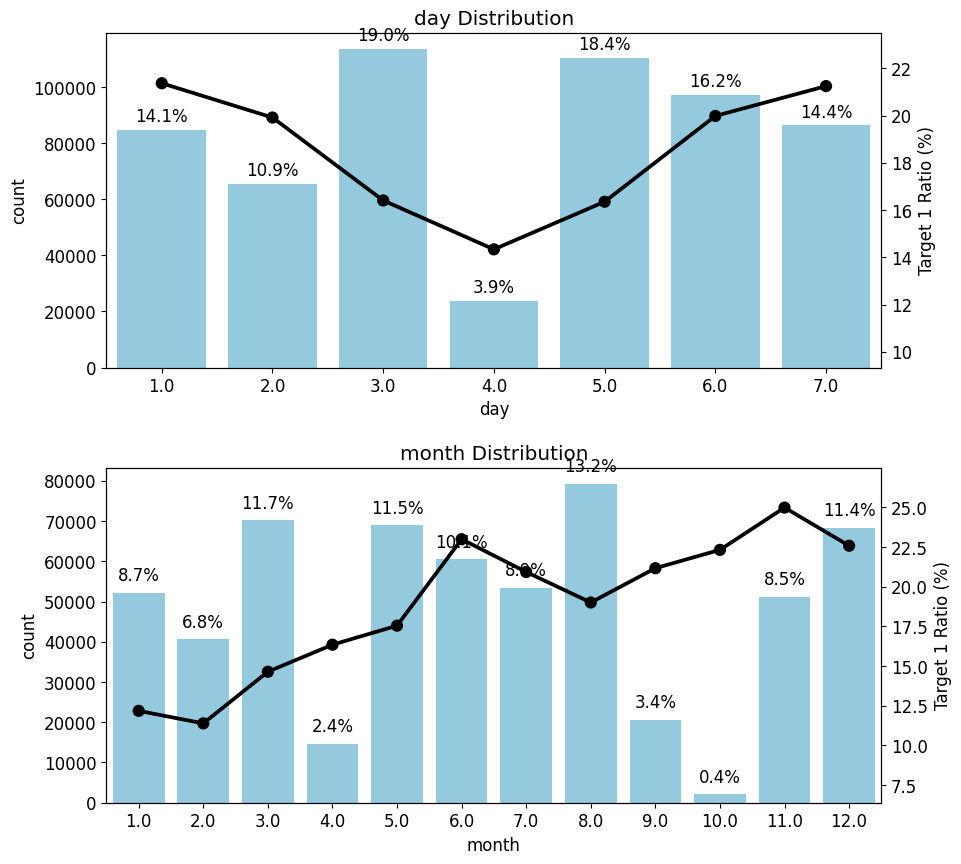

In [23]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, num_rows = 2, num_cols=1, size=(10,10))